<a href="https://colab.research.google.com/github/omarmx9/ML_repository/blob/main/Flight_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIBs

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from scipy import stats


# read data

In [ ]:
data = pd.read_csv('Clean_Dataset.csv')

In [ ]:
data.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [ ]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
data.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [ ]:
data.duplicated().sum()


0

In [ ]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.drop('flight', axis=1, inplace=True)

In [ ]:
data.tail()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Fit and transform the categorical column
data['airline'] = le.fit_transform(data['airline'])
data['source_city'] = le.fit_transform(data['source_city'])
data['stops'] = le.fit_transform(data['stops'])
data['departure_time'] = le.fit_transform(data['departure_time'])
data['arrival_time'] = le.fit_transform(data['arrival_time'])
data['destination_city'] = le.fit_transform(data['destination_city'])
data['class'] = le.fit_transform(data['class'])

In [ ]:
data.tail()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,5,1,4,0,2,3,0,10.08,49,69265
300149,5,1,0,0,5,3,0,10.42,49,77105
300150,5,1,1,0,5,3,0,13.83,49,79099
300151,5,1,1,0,2,3,0,10.00,49,81585
300152,5,1,4,0,2,3,0,10.08,49,81585


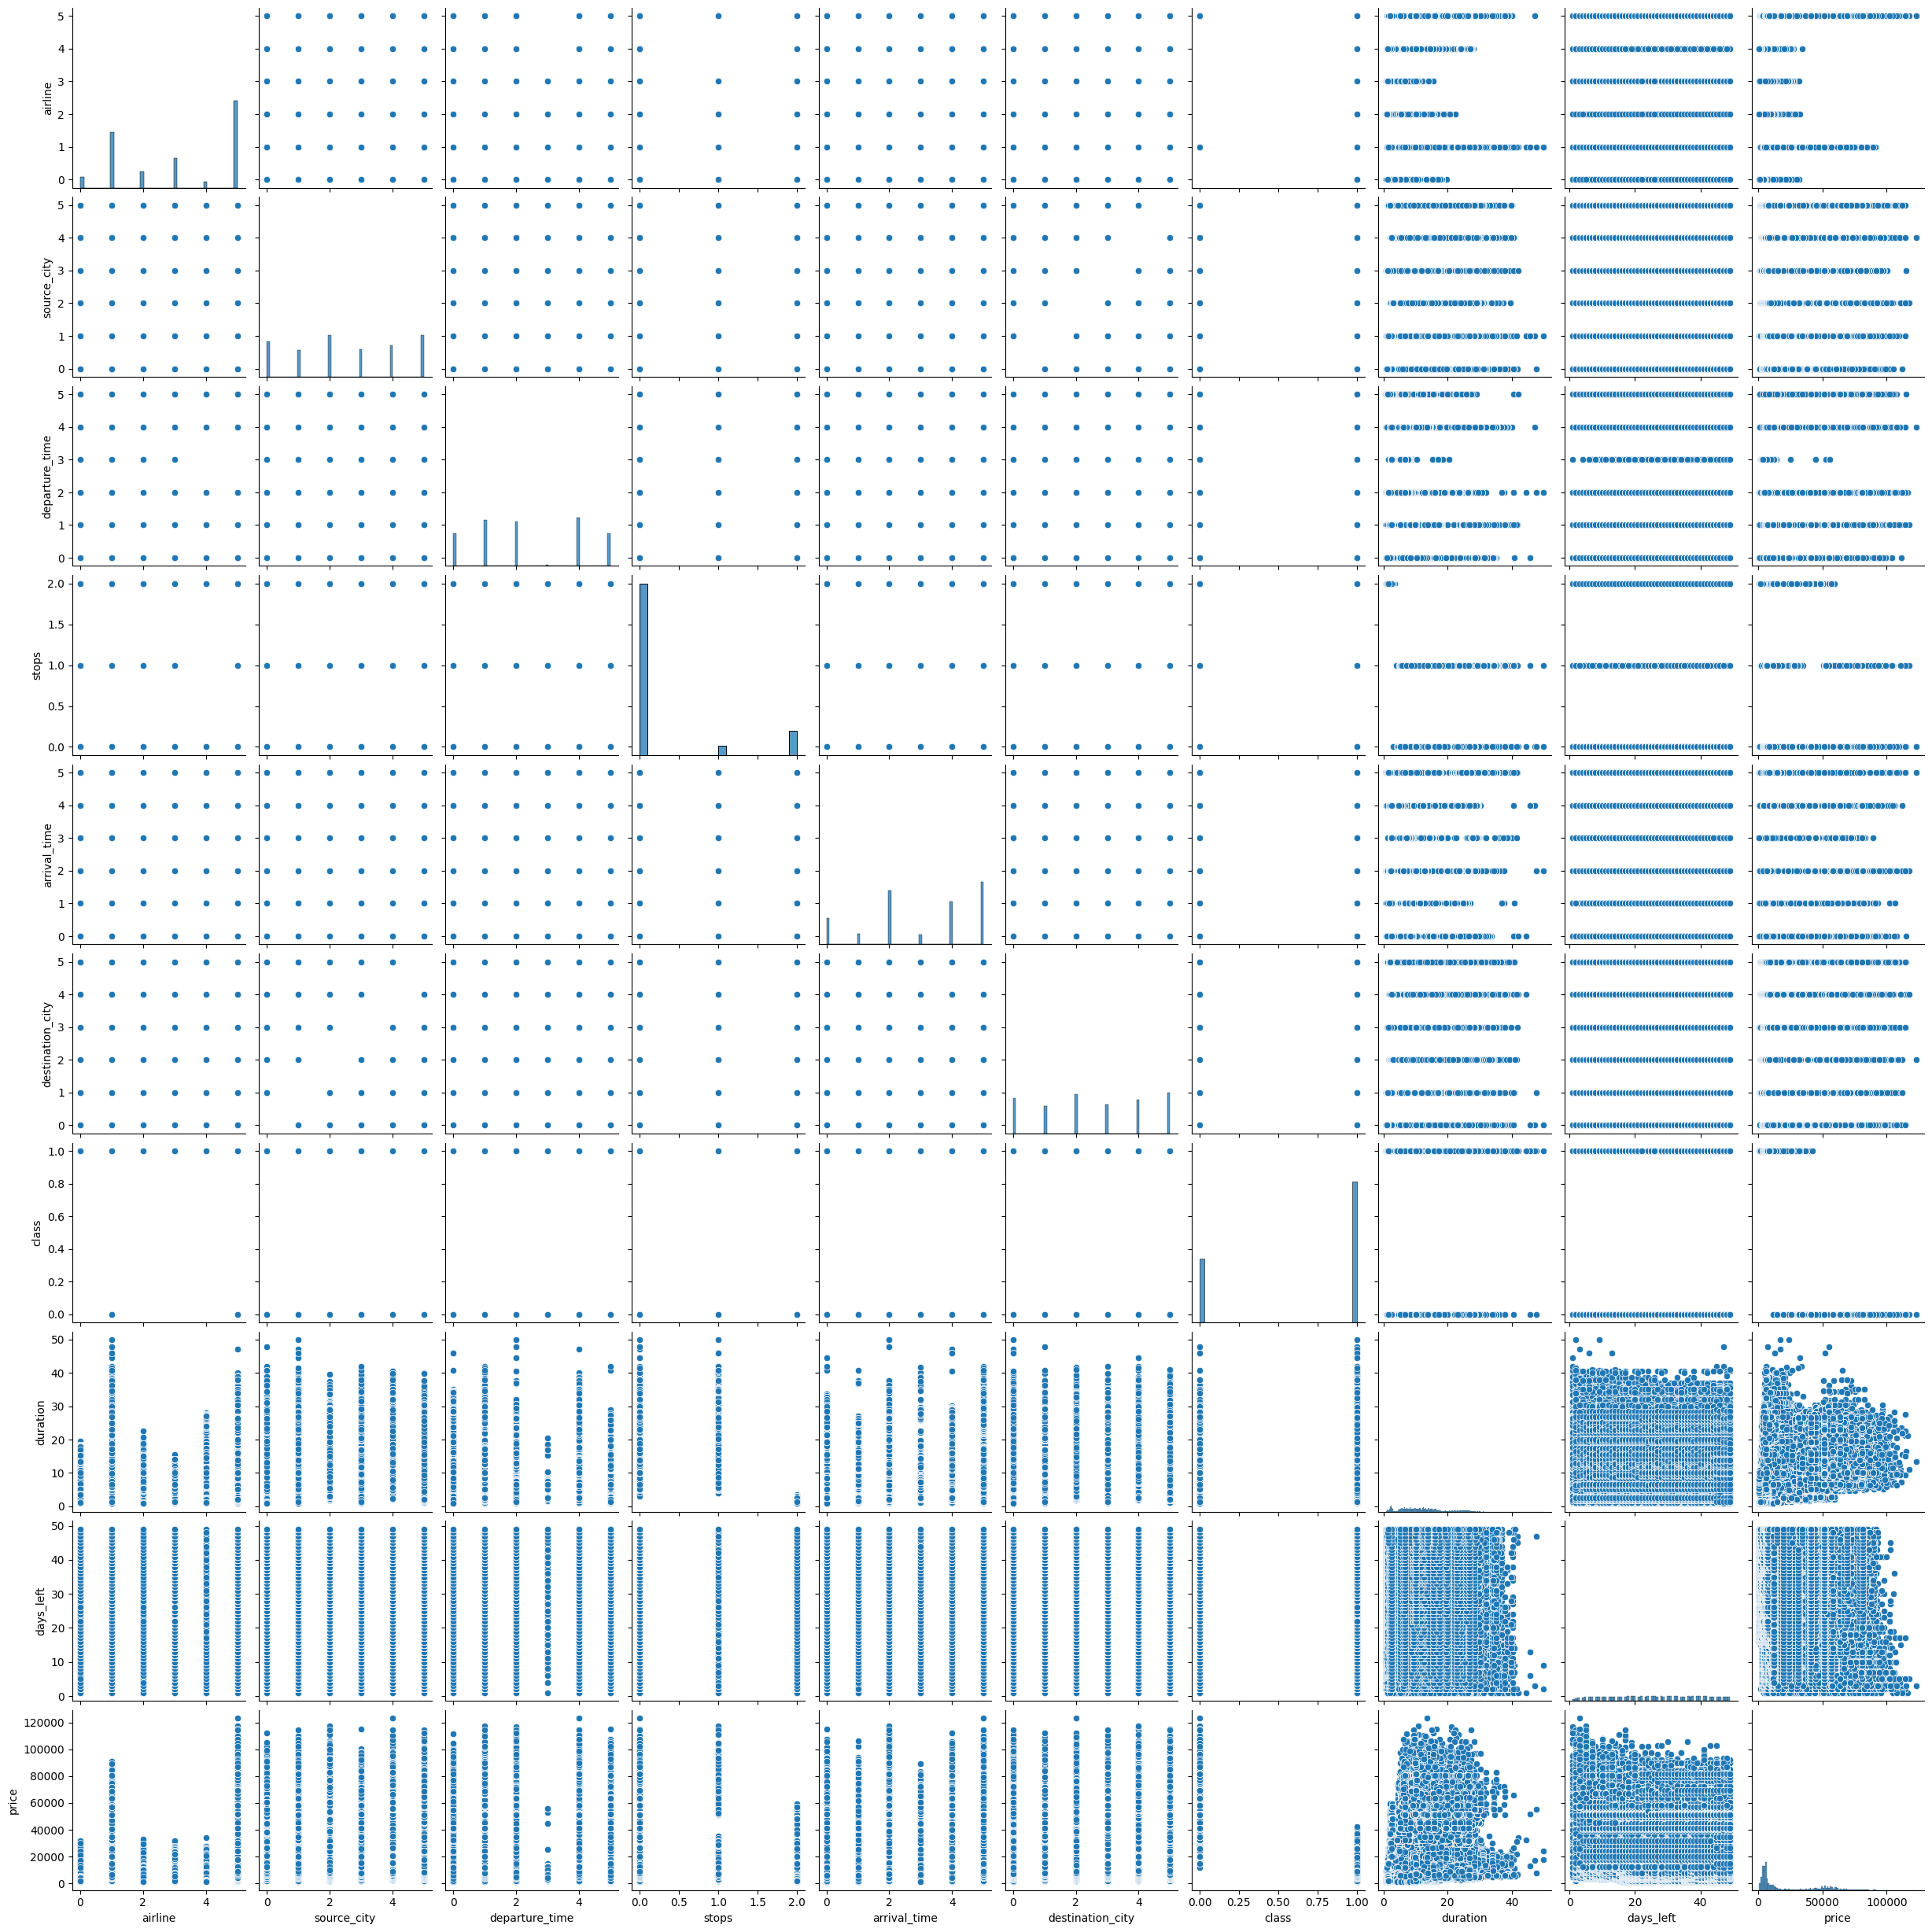

In [ ]:
sns.pairplot(data)

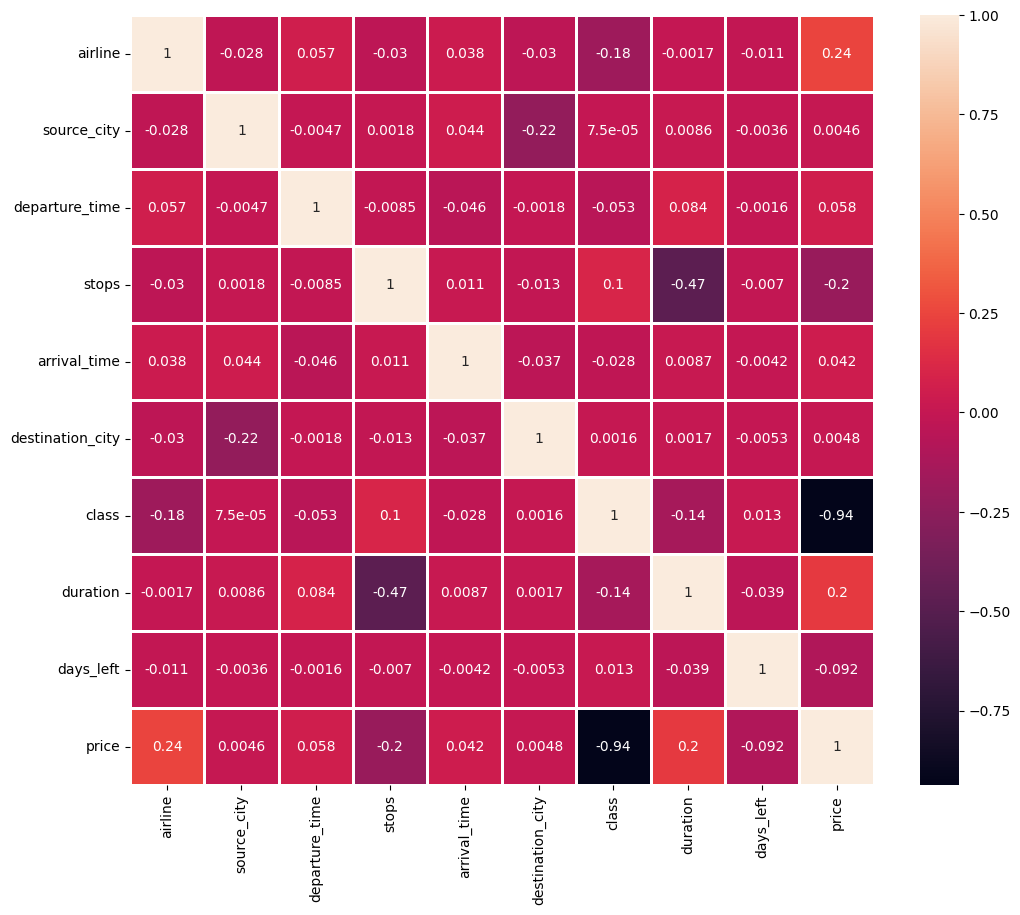

In [ ]:
plt.figure(figsize=(12,10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix,  annot=True, linewidth=2)
plt.show()

# OutLiers Handling

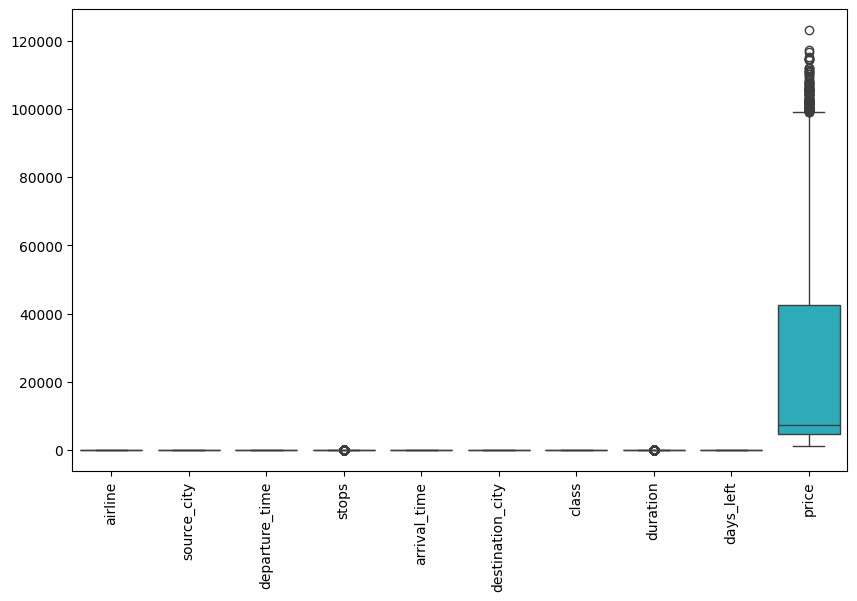

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data)
plt.xticks(rotation =90)
plt.show()

In [ ]:
# x =data.drop('price', axis=1)
# y =data['price']

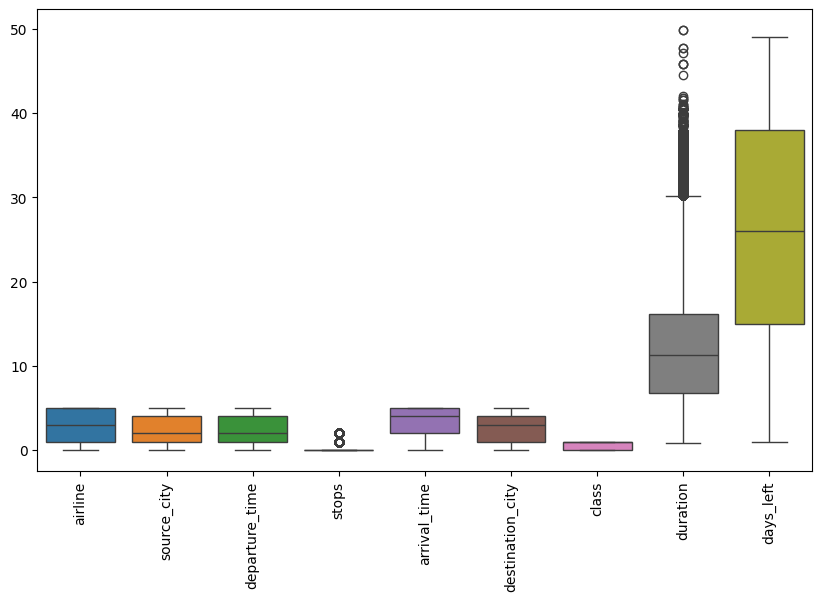

In [ ]:
# plt.figure(figsize=(10,6))
# sns.boxplot(x)
# plt.xticks(rotation =90)


In [ ]:
# plt.show()

In [ ]:
p5 = np.percentile(data.duration,25)
p95 = np.percentile(data.duration,75)

winsorized_data = np.copy(data.duration)
winsorized_data[winsorized_data < p5]=p5
winsorized_data[winsorized_data > p95]=p95
data.duration = winsorized_data

<Axes: ylabel='duration'>

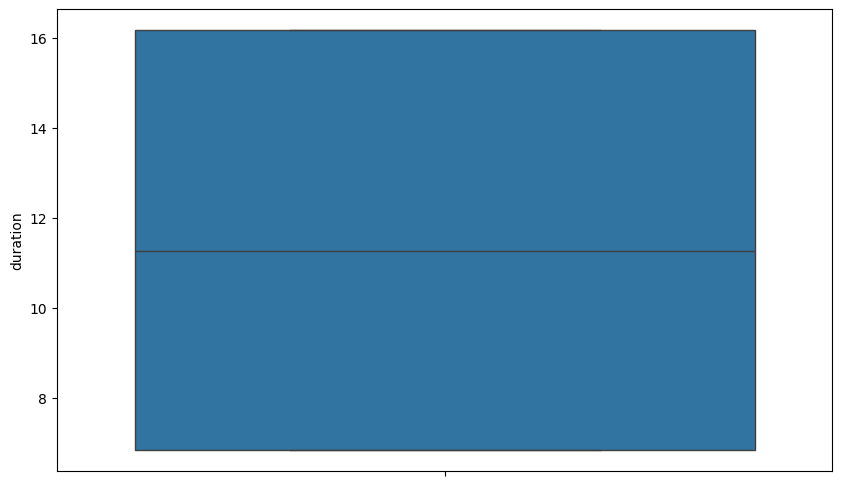

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data.duration)

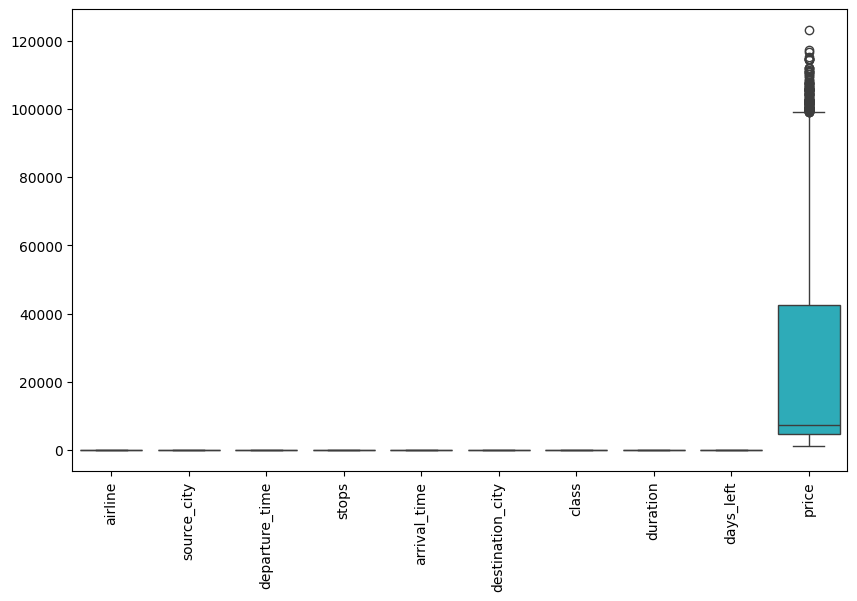

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data)
plt.xticks(rotation =90)
plt.show()

<Axes: ylabel='price'>

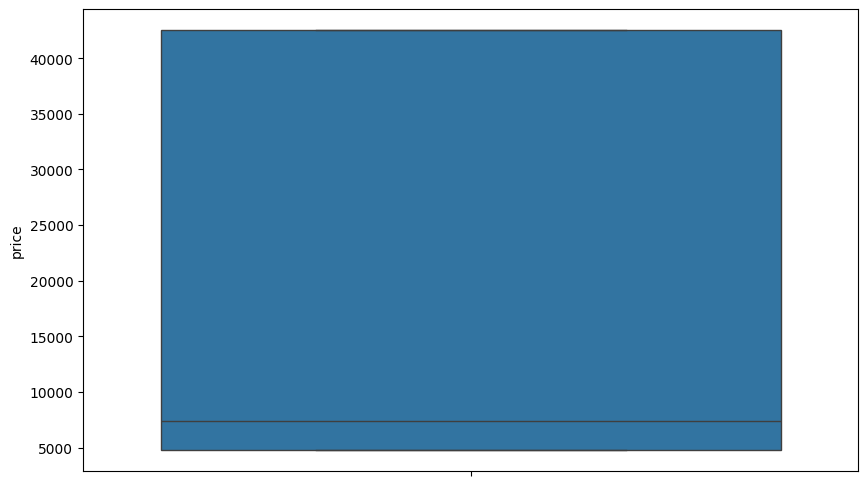

In [ ]:
p5 = np.percentile(data.price,25)
p95 = np.percentile(data.price,75)

winsorized_data = np.copy(data.price)
winsorized_data[winsorized_data < p5]=p5
winsorized_data[winsorized_data > p95]=p95
data.price = winsorized_data
plt.figure(figsize=(10,6))
sns.boxplot(data.price)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'airline'),
  Text(1, 0, 'source_city'),
  Text(2, 0, 'departure_time'),
  Text(3, 0, 'stops'),
  Text(4, 0, 'arrival_time'),
  Text(5, 0, 'destination_city'),
  Text(6, 0, 'class'),
  Text(7, 0, 'duration'),
  Text(8, 0, 'days_left'),
  Text(9, 0, 'price')])

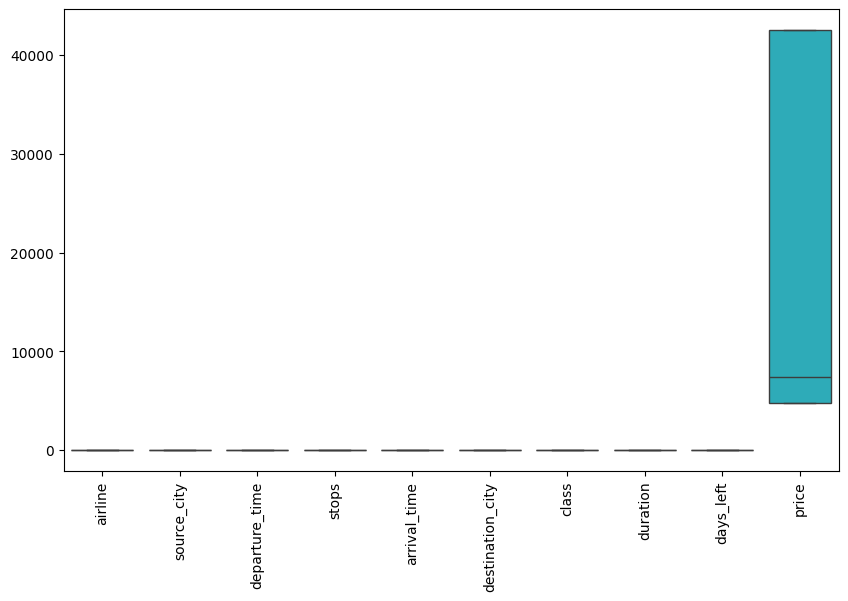

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data)
plt.xticks(rotation =90)

In [ ]:
x=data.drop('price', axis=1)
y=data['price']

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'airline'),
  Text(1, 0, 'source_city'),
  Text(2, 0, 'departure_time'),
  Text(3, 0, 'stops'),
  Text(4, 0, 'arrival_time'),
  Text(5, 0, 'destination_city'),
  Text(6, 0, 'class'),
  Text(7, 0, 'duration'),
  Text(8, 0, 'days_left')])

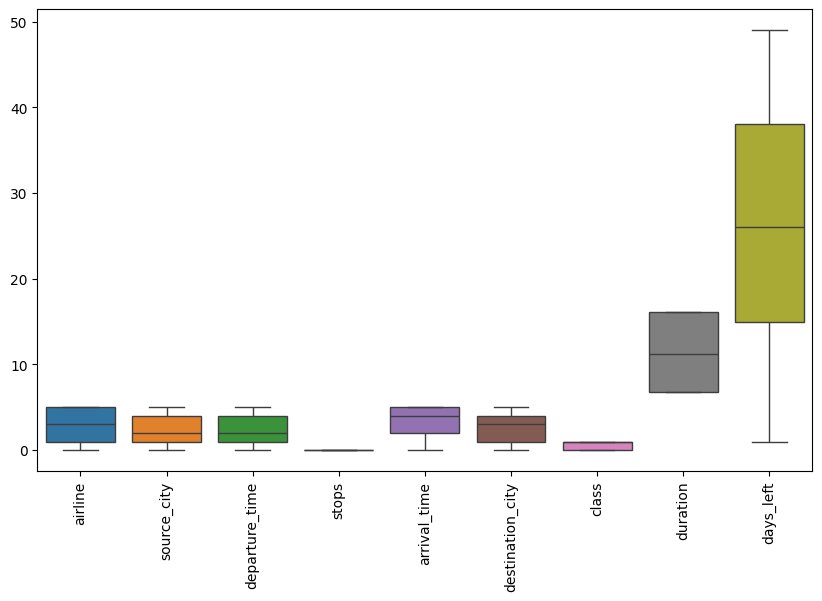

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x)
plt.xticks(rotation =90)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2=r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

Mean Squared Error: 11810954.613512011
R2 Score: 0.9544327363257361


In [ ]:
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")
r2=r2_score(y_test, model.predict(X_test))
print(f"R2 Score: {r2}")

Accuracy: 0.9544327363257361
R2 Score: 0.9544327363257361


In [ ]:
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print(f"Mean Squared Error: {mse}")
r2=r2_score(y_train, y_pred)
print(f"R2 Score: {r2}")

Mean Squared Error: 12085452.614559084
R2 Score: 0.9532718550316682
